                             **HAND WRITTEN DIGIT RECOGNITION**
           This project aims to use Convolutional Neural Network to identify 
                                handwritten digits as 0-9



In [ ]:
# importing the liberary.
import tensorflow as tf

# input the dataset.
mnist = tf.keras.datasets.mnist

# loading the dataset and splitting into training and test set.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# scaling and normalizing the data.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# creating CNN model.
model = tf.keras.models.Sequential()

# creating input layer. It shoud be flatten
model.add(tf.keras.layers.Flatten())

# creating multiple hidden layers(Dense layer).
# two argument in Dense keyword,
# Dense(no. of neurons, activation fn.).
# >> activation function is used to fire the neurons.
# here we will going use "relu"(rectified linear unit)
# activation fn.
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# creating output layer. It is also a Dense layers.
# No. of neurons in this layer will be less and 
# as it gives probability distribution hence,
# we are will going to use "softmax" activation fn.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Defining parameters for the train the model.

# compile takes 3 arguments,
# compiler(optimizer, loss, metrics).
# optmz->'adam', loss->'categorical_crossentropy', metrics->'accuracy'.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train the model.
# epochs gives the no. of times model train,
# loss and accuracy.
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2632 - accuracy: 0.9234
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1072 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0736 - accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0538 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0409 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0317 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0171 - accuracy: 0.9940
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.016

**Final accuracy on the test set data 99.41%**

In [ ]:
# calculating loss and accuracy.
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1203 - accuracy: 0.9734
0.12028954923152924 0.9733999967575073


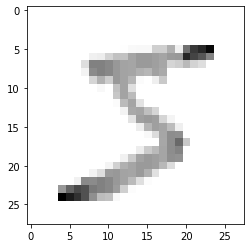

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

Saving the model using **'epic_num_reader.model'**.

In [ ]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


Reloading the saved model as **new_model**

In [ ]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Predicting the new_model.

In [ ]:
prediction = new_model.predict([x_test])

printing "prediction" gives **One hot arrays** as output.
These are actually the **probability distribution**.

In [ ]:
print(prediction)

[[3.05979526e-13 1.49870806e-12 2.02465635e-08 ... 9.99999762e-01
  6.60718496e-13 1.63931979e-08]
 [8.17982025e-21 5.05601894e-10 1.00000000e+00 ... 3.79224647e-22
  3.94312187e-12 5.11038146e-25]
 [6.24244376e-14 9.99999881e-01 3.81086940e-09 ... 1.05356484e-07
  1.42116683e-08 5.41733195e-12]
 ...
 [6.37639587e-17 1.94613742e-10 7.77450249e-16 ... 6.25548502e-10
  1.01976916e-09 1.38848399e-08]
 [4.86586183e-17 5.69961938e-13 2.50119710e-18 ... 1.91331004e-14
  1.07733840e-07 2.84569215e-16]
 [1.33379844e-11 1.38991669e-13 1.58849767e-13 ... 5.21236334e-19
  5.27749849e-15 1.08063421e-17]]


prediction for **x_test[index]**.

In [ ]:
import numpy as np

print(np.argmax(prediction[0]))

7


verifying prediction.

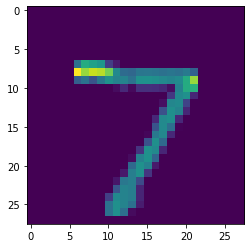

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
plt.show()